<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/logo_CV.jpeg" style="width:1500px;heigth:100px">



# <center> 15. A brief and  very preliminary introduction to deep learning! </center>


This guide uses tf.keras, a high-level API to build and train models in TensorFlow.


## <span style="color:red"> Outline </span> 
1. **DL: The most simple linear model**
2. **DL: The engineering solution and activation functions**
3. **DL: Training, Back-propagation and gradient descent**
4. **DL: Testing: Forward propagation**

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## <span style="color:green"> If you are in colaboratoy </span>: 

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/cv-uis-student/notebooks
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/cv-uis-student/notebooks
/content/drive/My Drive/cv-uis-student/notebooks


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/dl_1.png" style="width:500px;heigth:100px">
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/dl_2.png" style="width:500px;heigth:100px">

## <span style="color:red"> 1. DL: The most simple linear model </span> 


The **most sucesful** thecnique nowadays is based on the most simple classifier: **the linear classifier!**. The basic idea is to split classes by a linear boundary with dimensions according to the features of the problem. 


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/dl_3.png" style="width:800px;">


[Taken from **Standford University**.](http://cs231n.stanford.edu/)

- It is the most simple classifer, from which the predicted value $\hat{y}$ is represented as a **linear combination** of input variables $\mathbf{X} = [x_1, x_2, \ldots, x_n]$, so: 

$$\hat{y}(W, X) = w_0 + x_1 w_1+ x_2 w_2+ \ldots + x_n w_n$$
    -(x_i) Inputs: image features, pixels  
    -(W) Weights associated to each of the fetures
    -($\hat{y}$) predictions label. {cat, garfiel, car ...} 
     
**How?:** 

- Fit a linear model with coefficients $w = (w_0, \ldots, w_p)$ minimizing the residual sum of squares: 

$$min_{\mathbf{w}} ||\mathbf{X}w -y ||_{2}^{2}$$

**THE PROBLEM NOW IS TO FIND $\mathbf{w}$**

### This linear equation could be represented as a network:


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/dl1.jpg" style="width:500px;">



Why a relationship with **biological neurons**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/singleN.png " style="width:400px;">


**Go to the action!**

# CIFAR 10

The CIFAR ( Canadian Institute For Advanced Research )-10 is used for small photo classification problem on computer vision + Machine learning (specially deep learning). The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes. 

- 0: airplane
- 1: automobile
- 2: bird
- 3: cat
- 4: deer
- 5: dog
- 6: frog
- 7: horse
- 8: ship
- 9: truck


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
print ("CIFAR 10")
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(tf.__version__)

170500096/170498071 [==============================] - 6s 0us/step
CIFAR 10
(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)
1.15.0


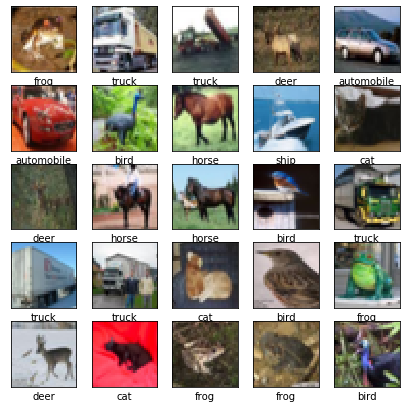

In [5]:
class_names = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(32,32,3), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

normalize and prepare data

In [4]:
x_train = x_train.reshape([-1, 32, 32, 3])
x_test = x_test.reshape([-1, 32, 32, 3])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (50000, 32, 32, 3)
Number of images in x_train 50000
Number of images in x_test 10000


## <span style="color:red"> 2. DNN: The engineering solution: hidden layers and activation functions </span> 


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/ANNs.gif" style="width:400px;">

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/dl2.jpg" style="width:300px;">



### Main componenets on DNN

- **input units:**  are raw information as input layer, namely a vectorized version of each sample. For MNIST is a flatten vector of 784 inputs. 
- **Hidden units:** are internal correlation on the network, which do the **magic!**. The input units and previous layers are correllated wit some **learned weights**. 
- **activation functions: ** introduce non-linearity into the output of a neuron. This is important because most real world data is non linear and we want neurons to learn these non linear representations.
    - *Softmax*, used in classification tasks, takes a vector of arbitrary real-valued scores and squashes it to a vector of values between zero and one to ensure that the outputs are probabilities. 
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/actifunc.png" style="width:400px;">    
- **output units** Give the result on correlation of network units, and namelly is mapped to a **sofmax function** to give a probability of each class. On MNIST sample the output layer should be 10 because we have 10 classes. 

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=[32, 32, 3]),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


## <span style="color:red"> 3. DL: Training, Back-propagation and gradient descent </span> 

For **training** is used a backpropagation strategy, which consist on compute derivatives from end-to-start into the network. The backpropagation is implemented using a thecnique named **Gradient Descent**, which ‘adjust’ all weights in the network with an aim of reducing the error at the output layer.



- **Backpropagation** best trade-off between intuition and formalism [here](http://home.agh.edu.pl/~vlsi/AI/backp_t_en/backprop.html)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/dl3.gif " style="width:400px;">


- **Stochastic gradient descent:**  select randomly a sub-set for training  because the high dimensional problem on DNN
- **Epochs** number of times that an **ENTIRE** dataset is passed orward and backward through the DNN
- **Batch size** is the sub-set of training examples to pass into during gradient descent training. For stochastic gradient descent is used the concep of mini-batch

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, batch_size=100, epochs=15, verbose=1)

Train on 50000 samples
Epoch 1/15
50000/50000 [==============================] - 3s 68us/sample - loss: 1.8739 - acc: 0.3253
Epoch 2/15
50000/50000 [==============================] - 2s 35us/sample - loss: 1.6673 - acc: 0.4044
Epoch 3/15
50000/50000 [==============================] - 2s 35us/sample - loss: 1.5809 - acc: 0.4351
Epoch 4/15
50000/50000 [==============================] - 2s 35us/sample - loss: 1.5249 - acc: 0.4572
Epoch 5/15
50000/50000 [==============================] - 2s 35us/sample - loss: 1.4814 - acc: 0.4715
Epoch 6/15
50000/50000 [==============================] - 2s 37us/sample - loss: 1.4534 - acc: 0.4793
Epoch 7/15
50000/50000 [==============================] - 2s 36us/sample - loss: 1.4119 - acc: 0.4967
Epoch 8/15
50000/50000 [==============================] - 2s 34us/sample - loss: 1.3893 - acc: 0.5058
Epoch 9/15
50000/50000 [==============================] - 2s 35us/sample - loss: 1.3617 - acc: 0.5139
Epoch 10/15
50000/50000 [==============================] - 

## <span style="color:red"> 4. DL: Testing: Forward propagation </span> 

Once we have trained our DNN, we follow a classical evaluation of a machine learning dataset. In such case we will to evaluate the accuracy:

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print('Test accuracy:', test_acc)

Test accuracy: 0.1941


see more deeply on predictions

In [14]:
predictions = model.predict(x_test)
print(predictions[0])
print ("valor predicho:",  np.argmax(predictions[0]), " clase: ", class_names[np.argmax(predictions[0])])
print ("max prob: ", np.max(predictions[0]), "ground truth: ", class_names[y_test[0]])

[0.14322138 0.1330338  0.08432301 0.07287288 0.06064724 0.06322215
 0.0537979  0.0799686  0.15945865 0.1494544 ]
valor predicho: 8  clase:  ship
max prob:  0.15945865 ground truth:  cat


Now, we can evaluate single examples, even new examples

In [16]:
## Individual predictions
img_rows, img_cols =32, 32
image_index = 444
plt.imshow(x_test[image_index].reshape(32, 32,3),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 3))
print ("the number predicted is: ", class_names[pred.argmax()])

the number predicted is:  frog


(10000, 10) (10000,) (10000, 32, 32, 3)


<Figure size 432x288 with 0 Axes>

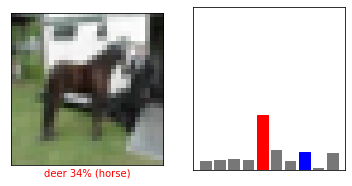

In [0]:
%run ../code/dl_plot.py
print (predictions.shape, y_test.shape, x_test.shape)

i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)

<Figure size 432x288 with 0 Axes>

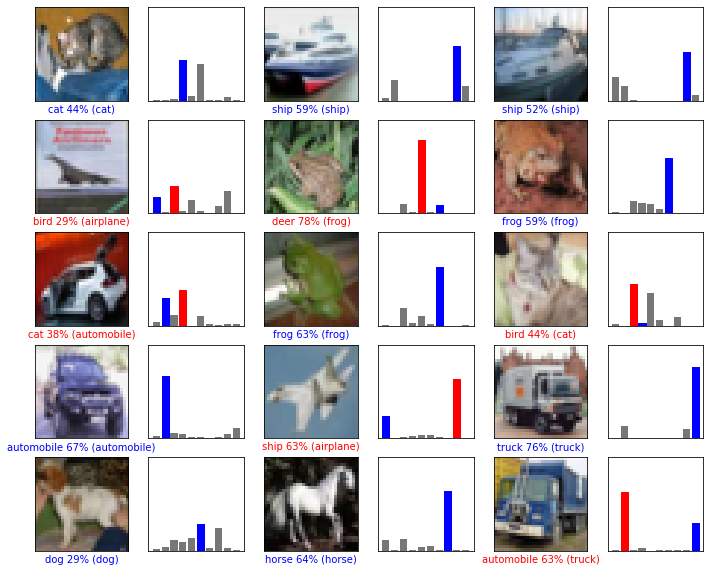

In [0]:
%run ../code/dl_plot.py
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)

## <span style="color:orange">student</span>: 

1. Change configuration with two different activation function: tanh, elu
2. Built a deep neural network more **deeply** and with much more neurons...and have patiente
3. Try with a dataset: for instance: **fashion mnist** from **keras**
4. Try with the local image classification dataset. 


### Some key Advantajes and Limitations

- Deep learning is the new state-of-the-art for artificial intelligence, achieving best accuracy in a lot of applications.
- Nowadays there exist a vast amount of neural network architectures designed to perform spicific tasks.
- This strategies namely require training data sets that are not only labeled but also sufficiently broad and universal.
    - In some cases, millions for them ...
- The interpretability of this models is limited, a fact, that could be fundamental in specific applications. 

# References

[1] Tensorflow: https://www.tensorflow.org/


[2] Playground: http://playground.tensorflow.org/


[3] Udacity deep learning course: https://classroom.udacity.com/courses/ud730

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">